# Packages

In [1]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells
import sympy as sp

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

# E12He RLC Resonant Circuits

Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

**1.** Series resonant circuit: Measure the frequency-dependent current draw of an RLC series resonant circuit for two different values of the damping resistance $R_d$ in a frequency range around the resonance frequency $f_0$ such that $0.2 \leq \frac{I(f)}{I(f_0)}\leq 1$

**2.** Evaluation of the series resonant circuit:

**2a.** Plot both resonance curves in one graph.

**2b.** Use the FWHM to determine the damping constants $\delta$ and the quality factors $Q$.

**2c.** Fit an appropriate model function to the measured resonance curves and determine $f_0$ and $\delta$.

**2d.** Calculate the capacitance of the capacitor using the Thomson equation.

**3.** Parallel resonant circuit: Measure the frequency-dependent current draw of a circuit in which the capacitor and coil are connected in parallel and in series with the resistor $R_d$.

**4.** Evaluation of the parallel resonant circuit:

**4a.** Derive an expression for the impedance of this circuit.

**4b.** Fit this model curve to the measured data. Determine $L, C, R_{Sp}$ and $R_d$ as well as the resonance frequency $f_0$.

**4c.** Compare the resonance frequency with the value obtained in task 2b

In [23]:
# GLOBALS
#task_1_title_str = ['0', '30', '45'] # Degrees
#phi_l = [0, -np.pi/6, np.pi/4]
folder_path = './data/Task4/Logging'

def fit_and_plot(df, x_col, y_col, xlabel, ylabel, title, fit_func=None, legend_labels=None):
    # Plot the scatter data
    plt.scatter(df[x_col], df[y_col], color='#ADD8E6', marker='x', label='Data')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    
    if fit_func is not None:
        # Perform non-linear regression using curve_fit
        x = df[x_col].values
        y = df[y_col].values
        params, cov_mat = curve_fit(fit_func, x, y)
        
        # Plot the fitted curve
        x_fit = np.linspace(min(x), max(x), 100)
        y_fit = fit_func(x_fit, *params)
        plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
    
    # Customize the legend if labels are provided
    if legend_labels is not None:
        plt.legend(legend_labels)
    else:
        plt.legend()
    
    plt.show()
    
    if fit_func is not None:
        return [params, cov_mat]
    else:
        return None
    
  

## Task 1

### Task 1a: Series Resonant Circuit Measurement

***Task Definition*** 

Series resonant circuit: Measure the frequency-dependent current draw of an RLC series resonant circuit for two different values of the damping resistance $R_d$ in a frequency range around the resonance frequency $f_0$ such that $0.2 \leq \frac{I(f)}{I(f_0)}\leq 1$

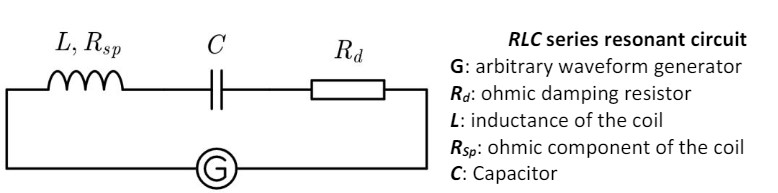

<IPython.core.display.Latex object>

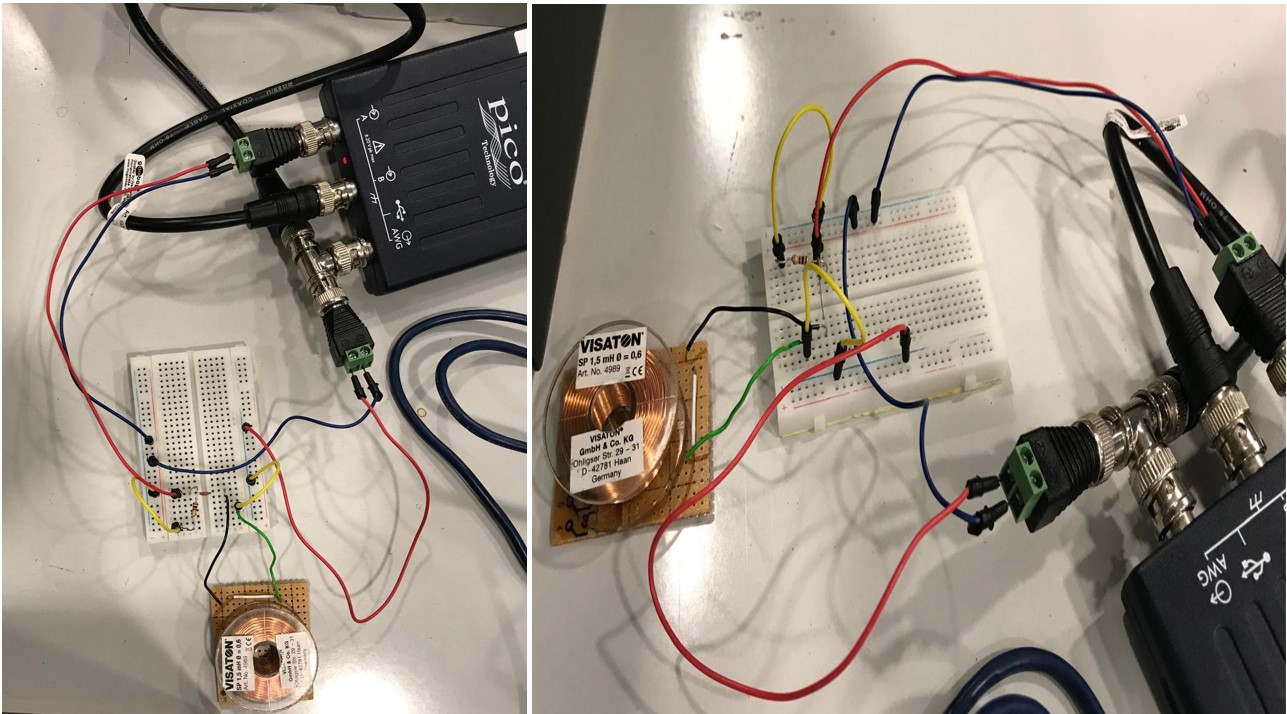

<IPython.core.display.Latex object>

In [3]:
dy(Im("./img/SD.jpg", height=100, width=500))
dy(Lx(r'$Figure\, 1.1$: Series RLC Circuit Diagram'))

dy(Im("./img/S.jpg", height=100, width=500))
dy(Lx(r'$Figure\, 1.2$: Series RLC Setup'))

***Procedure***

1. An RLC Series Circuit **Fig 1.2** is setup using the circuit diagram in **Fig 1.1**.
<br>

2. Sine waves of varying freqeuncies between 1 to 50kHz are generated by the picoscope, and supplied into the circuit. The peak to peak voltage of the output is then measured via Channel A of the picoscope.
<br>

3. The maximal value of the peak to peak voltage corresponding to $I(f_0)$ is found and used to plot a normalized graph of $ \frac{I(f)}{I(f_0)}$ against $f$ is plotted.
<br>



### Task 2a: Series Resonant Circuit Evaluation

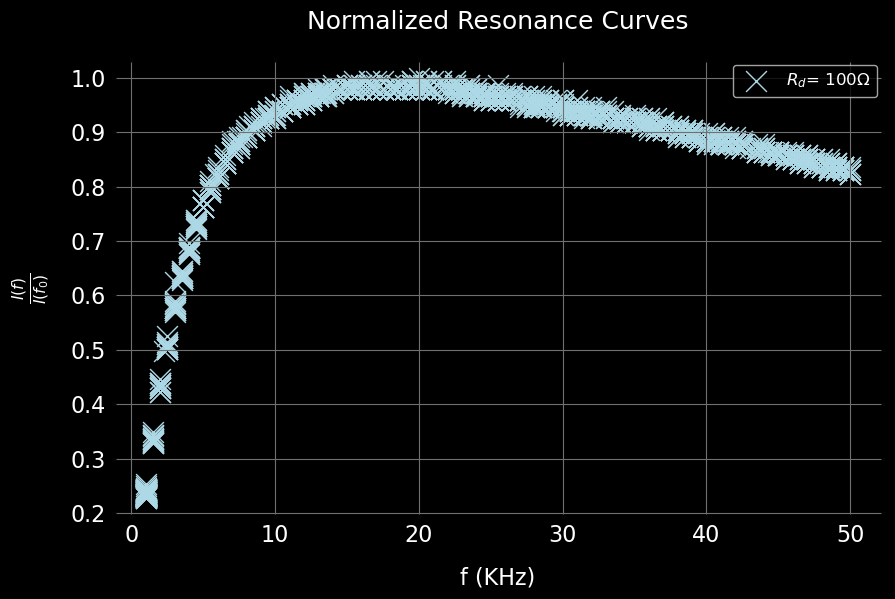

In [26]:
# Load the Excel file
file_path = folder_path + "/Series.xlsx"
df = pd.read_excel(file_path, 'Series')

# Extract and rename columns
df1 = df.iloc[:, [0, 2]].rename(columns={df.columns[2]: 'y1', df.columns[0]: 'x1'})

# Define Arguments
df1['x1'] = df1['x1'] * 1e-3  # Hz -> KHz
title = 'Normalized Resonance Curves'
xlabel = 'f (KHz)'
ylabel = r'$\frac{I(f)}{I(f_0)}$'
legend_labels = ['$R_d$= $100 \Omega$']

# Call the plotting function without using fit_func
fit_and_plot(df1, 'x1', 'y1', xlabel, ylabel, title, legend_labels=legend_labels)

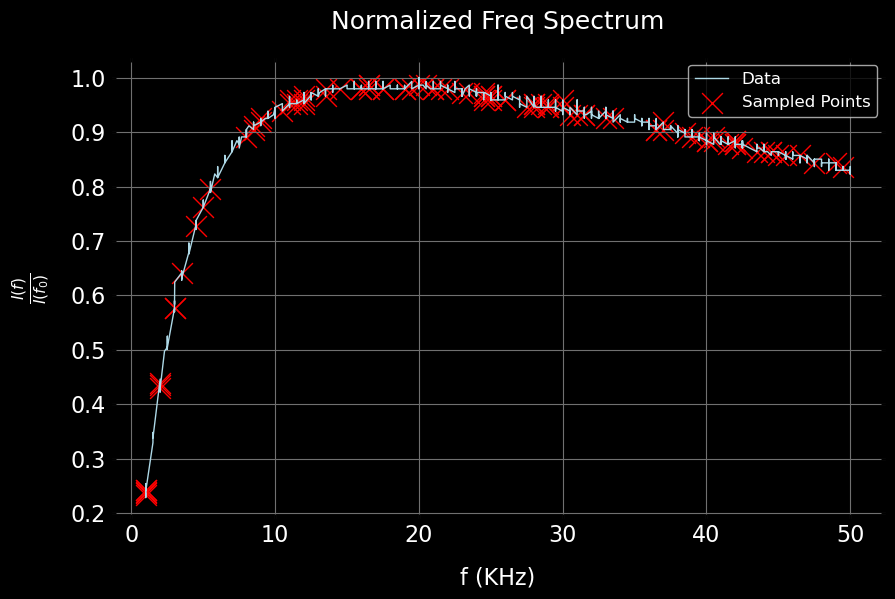

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fit_and_plot(df, x_col, y_col, xlabel, ylabel, title, scatter_points=100):
    # Plot all data points as a line
    plt.plot(df[x_col], df[y_col], color='#ADD8E6', label='Data')
    
    # Scatter a subset of points
    if scatter_points < len(df):
        scatter_indices = np.random.choice(df.index, size=scatter_points, replace=False)
        plt.scatter(df.loc[scatter_indices, x_col], df.loc[scatter_indices, y_col], color='red', marker='x', label='Sampled Points')
    else:
        plt.scatter(df[x_col], df[y_col], color='red', marker='x', label='Sampled Points')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Load the Excel file
file_path = folder_path + "/Series.xlsx"
df = pd.read_excel(file_path, sheet_name='Series')

# Extract and rename columns
df1 = df.iloc[:, [0, 2]].rename(columns={df.columns[2]: 'y1', df.columns[0]: 'x1'})

# Convert x1 from Hz to KHz
df1['x1'] = df1['x1'] * 1e-3 # Hz -> KHz

# Define plot parameters
title = 'Normalized Freq Spectrum'
xlabel = 'f (KHz)'
ylabel = r'$\frac{I(f)}{I(f_0)}$'

# Call the plotting function
fit_and_plot(df1, 'x1', 'y1', xlabel, ylabel, title, scatter_points=100)


## Task 1

***Task Definition*** 

Experimentally measure the light intensity as a function of the analyser angle for linear polarised light that passed through a $\frac{λ}{4}$ – plate under angles of $\phi = 0^\circ, 30^\circ$ and $45^\circ$.


***Theoretical Basis*** 

During this experiment, the value of $J_T$ may be calculated as follows:

In [ ]:
# Define the symbolic variables
phi = sp.symbols('phi')
theta = sp.symbols('theta')

# Define Matrix A as a 2 by 1 matrix
A = sp.Matrix([[0], [1]])

# Define the expressions for the elements of Matrix B
elem11 = (1 + sp.I*sp.cos(2*phi))
elem12 = -sp.I*sp.sin(2*phi)
elem21 = -sp.I*sp.sin(2*phi)
elem22 = (1 - sp.I*sp.cos(2*phi))

# Define the constant 1/sqrt(2)
sqrt2 = sp.sqrt(2)

# Waveplate
B = (1/sqrt2) * sp.Matrix([[elem11, elem12], [elem21, elem22]])

# Analyzer
C = sp.Matrix([[sp.sin(theta)**2, sp.sin(theta)*sp.cos(theta)], [sp.sin(theta)*sp.cos(theta), sp.cos(theta)**2]])

# Multiply the matrices
BA = B * A  # First multiply B and A
CBA = C * BA  # Then multiply C and the result of BA

# Display the result in LaTeX
latex_result = sp.latex(CBA)
dy(Lx('$$J_y = %s$$' % sp.latex(A)))
dy(Lx(r'$$M^{\phi}_{\lambda/4} = %s$$' % sp.latex(B)))
dy(Lx(r'$$M_{\theta} = %s$$' % sp.latex(C)))
dy(Lx(r'$$J^\phi_{T} = M_{\theta}M^{\phi}_{\lambda/4}J_y = %s$$' % sp.latex(CBA)))

Hence, the generalized fitting function is given by : $$I_T = A|J_T(\phi)|^2 + B \label{eq1.3} \tag{1.3}$$

- $A$ : Scaling parameter

- $B$ : Intercept parameter

In [ ]:
def make_f2opt(lambdified):
    return lambda x, a, b: a*lambdified(x)+b

In [ ]:
phi_str_l = ['0', r'\pi/6', r'\pi/4']
for i, phi_value in enumerate(phi_l):
    CBA_substituted = CBA.subs({phi: phi_value, theta: theta})
    
    
    norm_squared = sp.trigsimp(sp.expand_trig(CBA_substituted.norm()**2))

    # Convert the simplified expression to a LaTeX string
    
    # symbolic representation of fitting function
    fit_sym = CBA_substituted.norm()**2 
    # lamdify sym object
    python_formula = sp.lambdify(theta, fit_sym, 'numpy')
    # convert to fit function
    fit_f = make_f2opt(python_formula)
    fit = curve_fit(fit_f, np.deg2rad(x_l[i]), y_l[i])
    A = fit[0][0]
    u_A = np.sqrt(fit[1][0][0])
    B = fit[0][1]
    u_B = np.sqrt(fit[1][1][1])
    
    fit_y = fit_f(np.deg2rad(x_l[i]), A, B)
    
    plt.scatter(x_l[i], y_l[i], label='Data', marker='x')
    plt.plot(x_l[i], fit_y, label=r'Fit', color = 'r')
    plt.xlabel(r'$\theta^\circ$')
    plt.ylabel(r'Intensity ($V$)')
    if i==2:
        plt.axhline(0, color='grey')
    plt.grid(True)
    plt.title(r'$I_T(\theta)$ fit : $\phi = %s ^\circ$' % task_1_title_str[i])
    plt.legend()
    plt.show()
    dy(Lx(r'$Figure\, 1.%d$: Light intensity vs analyser angle fitting for $\phi = %s ^\circ$.' % (4 + i, task_1_title_str[i])))
    dy(Lx(r'$$J^{%s}_{T} = %s$$' % (phi_str_l[i], sp.latex(CBA_substituted))))
    #dy(Lx(r'$$|J^{%s}_{T}|^2 =%s$$' % (phi_str_l[i],sp.latex(norm_squared))))
    dy(Lx(r'$$I_T(\theta) = A|J^{%s}_{T}(\theta)|^2 + B$$' % (phi_str_l[i])))
    dy(Lx('where, '))
    dy(Lx(r'- $A = (%.2f ~ \pm %.3f) ~V$' % (A, u_A)))
    dy(Lx(r'- $B = (%.2f ~ \pm %.3f)~V$' % (B, u_B)))

***Analysis***

- It has been observed that the actual measurements are accurately represented by the theoretical fitting functions derived from Jones vectors and matrices.
</br> 

- A significant uncertainty is observed in parameters $A$ and $B$ corresponding to $\phi =\frac{\pi}{4}$. This is unusual and caused by python's inability to make a zero approximation for the imaginary component in $J^{\frac{\pi}{4}}_{T}(\theta)$. This leads to a failure to accurately determine the uncertainty of the fitting parameters.

***Sources of Errors***

Multiple sources of error were observed during the experiment which contributed to uncertainty in the recorded measurements of $I_T$.


- The room's brightness introduced a systemic error which was measured to be $\approx +0.004V$
</br>

- The voltmeter's resolution was $0.001V$ which introduced an error of $\pm 0.0005V$ 
</br>

- The optical analyser's resolution was $1^\circ$ which introduced an error of $\pm 0.5^\circ$ 
</br>

- The quarter waveplate's resolution was $5^\circ$ which introduced an error of $\pm 2.5^\circ$ 

## Task 2

***Task Definition*** 

Characterise the state of polarisation of three unknown black boxes in front of a light source using appropriate measurements.

***Theoretical Basis***

1. The procedure in Task 0 is repeated using unknown polarisers (BBC 1-3). 
</br> 

2. Measurements are carried out similar to Task 1. 
</br>

3. The data is analysed using **Fig2.1** to determine the state of polarisation of the unknown polarisers.

In [ ]:
dy(Im("./img/Diagram.jpg", height=800, width=800))
dy(Lx(r'$Figure\, 2.1$: Black Box polarization determination flowchart.'))

In [ ]:
folder_path = './data/Task2/'
task_2_title_str = ['BBC1', 'BBC2', 'BBC3']
label_str = ['Analyzer alone', r'With $\lambda/4$ plate']
for k in range(len(task_2_title_str)):
    csv_files = glob.glob(os.path.join(folder_path + task_2_title_str[k], "*.csv"))
    csv_files.sort(reverse=True)
    data_frames = []

    for file_path in csv_files:
        df = pd.read_csv(file_path)
        df.columns = ['X', 'Y']
        data_frames.append(df)
    
    x_l = []
    y_l = []
    #a, b = 0, 1
    for i, df in enumerate(data_frames):
        x = np.array(df['X'])
        y = np.array(df['Y'])
        #if i == 0: 
        #    b = y.max()
        #    a = y.min()
        #y = a + (y-a)/(b-a)
        x_l.append(x)
        y_l.append(y)
        plt.plot(x, y, label=label_str[i])

    #PLot Settings
    plt.xlabel(r'$\theta^\circ$')
    plt.ylabel(r'Intensity ($V$)')
    plt.grid(True)
    plt.title('%s Intensity measurements' % task_2_title_str[k])
    plt.legend(loc= 'upper right')
    plt.show()
    dy(Lx(r'$Figure\, 2.%d$: %s Light intensity vs analyser angle data plot.' % (2+k,task_2_title_str[k])))


***Analysis***

***BBC1:***

Measurements: 

1) Intensity varies with analyzer alone, and a non-zero minimum observed at $\theta=37^\circ$

2) Minimum intensity was observed at the same angle with the $\lambda/4$ plate as in analyzer alone.

Conclusion:

- BBC1 Polariser produces mixture of linearly polarized and unpolarized light. 
</br>

***BBC2 and BBC3:***

Measurements: 

1) A varying intensity $I_T$ was observed using the analyser alone, and a zero intensity is observed at $\theta = 60^\circ$ and $\theta = -5^\circ$ for BBC2 and BBC3 polarisers respectively. 

Conclusion:

- BBC2&3 Polariser produces linearly polarised light.

***References***

1) [O11e Lab instruction](https://moodle2.uni-leipzig.de/pluginfile.php/3621572/mod_resource/content/1/O11e_2024.pdf)
